# PyTorch
- PyTorch: 오픈소스 기계학습 및 딥러닝 프레임워크
- Python 언어를 통해 데이터를 처리하고 기계학습 알고리즘을 설계할 수 있게 함.
- PyTorch는 GPU 연산 등 다양한 기능을 지원하여 대부분의 기계학습/인공지능 연구자들은 PyTorch를 사용함. [PapersWithCode Trends](https://paperswithcode.com/trends)

In [ ]:
# PyTorch import
import torch
torch.__version__

'2.6.0+cu124'

# 1. Tensors

- 기계학습에서 기본적인 구성 요소이며, 데이터를 수치적으로 표현함.
- 아래 이미지를 `[3, 244, 244]` 형태의 텐서로 표현할 수 있음.
- `[색상 채널 수, 높이, 너비]`를 의미하며, 해당 이미지는 `3`개의 색상 채널(빨강, 초록, 파랑), `224` 픽셀의 높이, `224` 픽셀의 너비를 가지고 있다는 뜻.
 - 즉, `색상 채널`, `높이`, `너비`의 세 가지 차원을 가지는 3차원 텐서

![example of going from an input image to a tensor representation of the image, image gets broken down into 3 colour channels as well as numbers to represent the height and width](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/00-tensor-shape-example-of-image.png)

## 1.1. 텐서 생성

- **Scalar**: 단일 숫자, 0차원 텐서

In [ ]:
# Scalar
scalar = torch.tensor(7)
scalar

tensor(7)

In [ ]:
# dim 확인
scalar.ndim

0

- **Vector**: 1차원 텐서, 무엇을 나타내느냐에 따라 유연하게 사용됨.

In [ ]:
# Vector
vector = torch.tensor([7, 7])
vector

tensor([7, 7])

In [ ]:
# vector dim 확인
vector.ndim

1

PyTorch에서 텐서가 몇 차원인지 알아보는 방법은 바깥쪽의 대괄호(`[`)의 수를 세는 것임.

- `shape`: 텐서 내부의 요소들이 어떻게 배열되어 있는지를 나타냄.

In [ ]:
# vector의 shape 확인
vector.shape

torch.Size([2])

- **Matrix**(행렬)

In [ ]:
# Matrix
MATRIX = torch.tensor([[7, 8],
                       [9, 10]])
MATRIX

tensor([[ 7,  8],
        [ 9, 10]])

In [ ]:
# matrix의 dim 확인
MATRIX.ndim

2

In [ ]:
# matrix의 shape 확인
MATRIX.shape

torch.Size([2, 2])

- **Tensor**:

In [ ]:
# Tensor
TENSOR = torch.tensor([[[1, 2, 3],
                        [3, 6, 9],
                        [2, 4, 5]]])
TENSOR

tensor([[[1, 2, 3],
         [3, 6, 9],
         [2, 4, 5]]])

In [ ]:
# dim 확인
TENSOR.ndim

3

In [ ]:
# shape 확인
TENSOR.shape

torch.Size([1, 3, 3])

![example of different tensor dimensions](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/00-pytorch-different-tensor-dimensions.png)

| 이름      | 정의                                 | 차원 수                             | 일반적으로 사용하는 표기 (예시) |
| ------- | ---------------------------------- | -------------------------------- | ------------------ |
| **scalar** | 하나의 숫자                             | 0차원                              | 소문자 (`a`)          |
| **vector**  | 방향을 가진 숫자 (예: 방향이 포함된 풍속) 또는 여러 숫자 | 1차원                              | 소문자 (`y`)          |
| **matrix**  | 2차원 숫자 배열                          | 2차원                              | 대문자 (`Q`)          |
| **tensor**  | n차원 숫자 배열                          | 어떤 차원이든 가능함<br>0차원은 스칼라, 1차원은 벡터 | 대문자 (`X`)          |

![scalar vector matrix tensor and what they look like](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/00-scalar-vector-matrix-tensor.png)

## 1.2. 랜덤 텐서

- 텐서는 어떤 형태로든 데이터를 표현하고, 딥러닝 모델들은 텐서를 업데이트하고 그 안에서 패턴을 찾아냄.

- 딥러닝 모델을 만들 때, 앞서 텐서 값을 일일히 설정하지 않음.

- 일반적으로 랜덤 숫자로 채워진 큰 텐서로 시작하여 데이터를 훈련하며 이 숫자들을 점점 데이터에 맞게 잘 조정해나감.

In [ ]:
# size (3, 4)인 랜덤 텐서 생성
random_tensor = torch.rand(size=(3, 4))
random_tensor, random_tensor.dtype

(tensor([[0.6801, 0.0512, 0.8092, 0.4182],
         [0.7308, 0.8374, 0.5364, 0.7047],
         [0.8566, 0.7383, 0.4918, 0.3824]]),
 torch.float32)

In [ ]:
# size (224, 224, 3)인 랜덤 텐서 생성
random_image_size_tensor = torch.rand(size=(224, 224, 3))
random_image_size_tensor.shape, random_image_size_tensor.ndim

(torch.Size([224, 224, 3]), 3)

## 1.3. 0 혹은 1로 구성된 텐서

- 마스킹(masking) 작업에서 자주 사용됨. 이는 모델이 학습하지 않야아 할 값을 0으로 채우는 작업임.

In [ ]:
# 모두 0인 텐서 생성
zeros = torch.zeros(size=(3, 4))
zeros, zeros.dtype

(tensor([[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]),
 torch.float32)

In [ ]:
# 모두 1인 텐서 생성
ones = torch.ones(size=(3, 4))
ones, ones.dtype

(tensor([[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]]),
 torch.float32)

## 1.4. 텐서 데이터 타입

- PyTorch에는 다양한 [텐서 데이터 타입](https://docs.pytorch.org/docs/stable/tensors.html#data-types)이 존재함.

- 보통 `torch.float32` (더 간단히 `torch.float`)을 가장 흔하게 사용하며 기본값으로 설정됨.

- 일부는 CPU, 일부는 GPU에 특화됨.

 - 코드에서 `torch.cuda`가 텐서에서 보이면, 해당 텐서는 GPU용(특히 Nvidia GPU의 CUDA 툴킷)으로 사용되고 있다는 뜻임.

In [ ]:
# 텐서의 기본 데이터 타입은 float32
float_32_tensor = torch.tensor([3.0, 6.0, 9.0],
                               dtype=None, # 기본값 None이며 자동으로 torch.float32로 설정됨
                               device=None, # 기본값 None, 자동으로 cpu로 설정됨
                               requires_grad=False) # True로 설정되면 텐서에 수행된 연산이 기록됨

float_32_tensor.shape, float_32_tensor.dtype, float_32_tensor.device

(torch.Size([3]), torch.float32, device(type='cpu'))

- PyTorch의 가장 흔한 에러는 테이터 타입과 device(CPU, GPU) 관련임.

 - 데이터 타입이 서로 다른 텐서의 연산은 불가능함.

 - CPU에 로드된 텐서와 GPU에 로드된 텐서의 연산은 불가능함.

In [ ]:
# dtype=torch.float16을 사용해 텐서를 생성
float_16_tensor = torch.tensor([3.0, 6.0, 9.0],
                               dtype=torch.float16)

float_16_tensor.dtype

torch.float16

## 1.5. 텐서 정보 파악

텐서에서 가장 자주 확인하게 될 대표적 속성 세가지는 다음과 같음.
- `shape`:  텐서의 형태는 무엇인가?
- `dtype`: 텐서 내부 요소들의 데이터 타입은 무엇인가?
- `device`: 텐서가 저장되어 있는 디바이스는 어디인가?

In [ ]:
# 텐서 생성
some_tensor = torch.rand(3, 4)

In [ ]:
# 정보 출력
print(some_tensor)
print(f"Shape of tensor: {some_tensor.shape}")
print(f"Datatype of tensor: {some_tensor.dtype}")
print(f"Device tensor is stored on: {some_tensor.device}") # CPU가 기본

tensor([[0.1589, 0.2481, 0.0690, 0.7718],
        [0.0315, 0.8863, 0.0090, 0.5083],
        [0.9688, 0.3246, 0.3335, 0.3689]])
Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu


## 1.6. 텐서 기본 연산

딥러닝에서는 이미지, 텍스트, 비디오 등 다양한 데이터가 텐서 형태로 표현됨. 딥러닝 모델은 수많은 연산을 통해 입력 데이터 속 패턴을 학습함.

아래 연산들은 신경망의 기본 요소라고 할 수 있음.
- 덧셈
- 뺄셈
- 원소 간 곱 (element-wise multiplication)
- 나눗셈
- 행렬 곱 (matrix multiplication)

In [ ]:
# 덧셈
tensor = torch.tensor([1, 2, 3])
tensor + 10

tensor([11, 12, 13])

In [ ]:
# 곱셈
tensor * 10

tensor([10, 20, 30])

- 텐서 내부의 값은 재할당 하지 않는 한 변경되지 않음.

In [ ]:
tensor

tensor([1, 2, 3])

In [ ]:
# 뺄셈 후 재할당
tensor = tensor - 10
tensor

tensor([-9, -8, -7])

In [ ]:
# 덧셈 후 재할당
tensor = tensor + 10
tensor

tensor([1, 2, 3])

- PyTorch는 기본 연산을 위한 빌트인 함수([`torch.mul()`](https://pytorch.org/docs/stable/generated/torch.mul.html#torch.mul), [`torch.add()`](https://pytorch.org/docs/stable/generated/torch.add.html))들이 구현되어 있음.

In [ ]:
torch.mul(tensor, 10)

tensor([10, 20, 30])

In [ ]:
# 이 또한 재할당 하지 않는 한 변경되지 않음.
tensor

tensor([1, 2, 3])

- `torch.mul()`보다는 `*` 같은 연산자 기호를 사용하는 것이 더 일반적임.

In [ ]:
print(tensor, "*", tensor)
print("Equals:", tensor * tensor)

tensor([1, 2, 3]) * tensor([1, 2, 3])
Equals: tensor([1, 4, 9])


## 1.7. 텐서의 행렬 곱

딥러닝에서 가장 일반적인 연산 중 하나이며, PyTorch는 `torch.matmul()`을 통해 행렬 곱셈 기능을 제공함.

행렬 곱셈에서 다음 두가지 규칙을 꼭 기억:

1. inner dimensions가 일치해야 함.
 - `(3, 2) @ (3, 2)` → 오류
 - `(2, 3) @ (3, 2)` → 작동함
 - `(3, 2) @ (2, 3)` → 작동함
2. 연산된 행렬은 outer dimension의 형태를 가짐.
 - `(2, 3) @ (3, 2) → (2, 2)`
 - `(3, 2) @ (2, 3) → (3, 3)`


In [ ]:
tensor = torch.tensor([1, 2, 3])
tensor.shape

torch.Size([3])

요소별 곱셈과 행렬 곱셈의 차이는 **값을 어떻게 더하느냐**에 있음.

예를 들어 `[1, 2, 3]` 값을 가진 `tensor` 변수에 대해 다음과 같은 차이가 존재함.

| 연산 종류                                    | 계산 방식                           | 코드                      |
| ---------------------------------------- | ------------------------------- | ----------------------- |
| **요소별 곱셈 (Element-wise multiplication)** | `[1*1, 2*2, 3*3]` = `[1, 4, 9]` | `tensor * tensor`       |
| **행렬 곱셈 (Matrix multiplication)**        | `1*1 + 2*2 + 3*3` = `[14]`      | `tensor.matmul(tensor)` |

In [ ]:
# Element-wise matrix multiplication
tensor * tensor

tensor([1, 4, 9])

In [ ]:
# Matrix multiplication
torch.matmul(tensor, tensor)

tensor(14)

- `@` 기호를 통해 행렬 곱셈을 할 수 있으나, `torch.matmul()`이 속도가 더 빠르기 때문에 권장되지 않음.

In [ ]:
%%time
# 손으로 행렬곱 계산
# for loop 사용한 연산은 최대한 피할것 (계산 비용 큼)
value = 0
for i in range(len(tensor)):
  value += tensor[i] * tensor[i]
value

CPU times: user 457 µs, sys: 0 ns, total: 457 µs
Wall time: 796 µs


tensor(14)

In [ ]:
%%time
torch.matmul(tensor, tensor)

CPU times: user 145 µs, sys: 12 µs, total: 157 µs
Wall time: 109 µs


tensor(14)

## 1.8. `shape` 오류

- 딥러닝에서는 대부분 연산이 행렬 간 곱셈 및 연산으로 이루어져 있음. 형렬에는 연산 가능한 형태(shape)와 크기에 대한 규칙이 존재하기에 shape mismatch 오류가 가장 흔하게 일어남.

In [ ]:
# 해당 셀은 오류 난 채로 제출
# 텐서의 shape이 맞아야 함
tensor_A = torch.tensor([[1, 2],
                         [3, 4],
                         [5, 6]], dtype=torch.float32)

tensor_B = torch.tensor([[7, 10],
                         [8, 11],
                         [9, 12]], dtype=torch.float32)

torch.matmul(tensor_A, tensor_B) # (<- 오류 발생)

RuntimeError: mat1 and mat2 shapes cannot be multiplied (3x2 and 3x2)

`tensor_A`와 `tensor_B` 사이에서 행렬 곱셈을 가능하게 하려면, inner dimension 을 **전치(transpose)**를 통해 일치시켜야 함.

- `torch.transpose(input, dim0, dim1)` : 여기서 `input`은 전치하려는 텐서이고, `dim0`, `dim1`은 서로 바꿀 차원임.
- `tensor.T` : 여기서 `tensor`는 전치하려는 텐서임.

In [ ]:
# tensor_A과 tensor_B 확인
print(tensor_A)
print(tensor_B)

tensor([[1., 2.],
        [3., 4.],
        [5., 6.]])
tensor([[ 7., 10.],
        [ 8., 11.],
        [ 9., 12.]])


In [ ]:
# tensor_A과 tensor_B.T 확인
print(tensor_A)
print(tensor_B.T)

tensor([[1., 2.],
        [3., 4.],
        [5., 6.]])
tensor([[ 7.,  8.,  9.],
        [10., 11., 12.]])


In [ ]:
# tensor_B가 전치되었을 때 연산은 정상적으로 작동함.
print(f"Original shapes: tensor_A = {tensor_A.shape}, tensor_B = {tensor_B.shape}\n")
print(f"New shapes: tensor_A = {tensor_A.shape} (same as above), tensor_B.T = {tensor_B.T.shape}\n")
print(f"Multiplying: {tensor_A.shape} * {tensor_B.T.shape} <- inner dimensions match\n")
print("Output:\n")
output = torch.matmul(tensor_A, tensor_B.T)
print(output)
print(f"\nOutput shape: {output.shape}")

Original shapes: tensor_A = torch.Size([3, 2]), tensor_B = torch.Size([3, 2])

New shapes: tensor_A = torch.Size([3, 2]) (same as above), tensor_B.T = torch.Size([2, 3])

Multiplying: torch.Size([3, 2]) * torch.Size([2, 3]) <- inner dimensions match

Output:

tensor([[ 27.,  30.,  33.],
        [ 61.,  68.,  75.],
        [ 95., 106., 117.]])

Output shape: torch.Size([3, 3])


![visual demo of matrix multiplication](https://github.com/mrdbourke/pytorch-deep-learning/raw/main/images/00-matrix-multiply-crop.gif)

신경망은 **행렬 곱셈(matrix multiplication)** 과 **내적(dot product)** 으로 구성됨.

[`torch.nn.Linear()`](https://pytorch.org/docs/1.9.1/generated/torch.nn.Linear.html) 모듈(feed forward layer 혹은 fully connected layer로 지칭됨)은 입력 `x`와 가중치 행렬 `A` 사이의 행렬 곱을 수행함.

$$
y = x \cdot A^T + b  
$$

여기서:

* `x`: 해당 층에 입력되는 값
* `A`: 층이 생성한 가중치 행렬(weights matrix)로, 처음에는 무작위 숫자로 시작하지만 학습 과정에서 데이터의 패턴을 더 잘 표현할 수 있도록 계속 조정됨.
  * `A` 대신 `W`, `X` 등 다른 문자로도 표현되기도 함.
* `b`: 편향 항(bias term)
* `y`: 최종 출력값


In [ ]:
# Linear layer은 랜덤 weight으로 시작하므로, 재현가능하도록 시드 서정
torch.manual_seed(42)

In [ ]:
# nn.Linear은 matrix multiplication 적용
# in_features = 입력의 inner dimension과 일치
# out_features = outer value 설정
linear = torch.nn.Linear(in_features=3, out_features=6)

In [ ]:
x = tensor_A
output = linear(x)
print(f"Input shape: {x.shape}\n")
print(f"Output:\n{output}\n\nOutput shape: {output.shape}")

RuntimeError: mat1 and mat2 shapes cannot be multiplied (3x2 and 3x6)

> **실습과제:** 1. 위에서 `in_features` 값을 `2`에서 `3`으로 변경하시오. 에러가 발생하는가?
> 2. `in_features=3`일 때, 에러를 해결하기 위해 입력값(`x`)의 형태(shape)를 어떻게 바꿔야 하는가?


In [ ]:
x = tensor_A
x = x.T
output = linear(x)
print(f"Input shape: {x.shape}\n")
print(f"Output:\n{output}\n\nOutput shape: {output.shape}")

Input shape: torch.Size([2, 3])

Output:
tensor([[0.9332, 0.8805, 3.0149, 1.5545, 1.8186, 2.0634],
        [1.7186, 1.4009, 3.5818, 1.7408, 2.6017, 2.5123]],
       grad_fn=<AddmmBackward0>)

Output shape: torch.Size([2, 6])


> **답:**
1. 에러가 발생한다.
2. x의 차원을 2*3으로 전치시켜서 곱에 사용해야함

## 1.9. 텐서의 min, max, mean, sum 등

In [ ]:
# 텐서 생성
x = torch.arange(0, 100, 10)
x

tensor([ 0, 10, 20, 30, 40, 50, 60, 70, 80, 90])

In [ ]:
print(f"Minimum: {x.min()}")
print(f"Maximum: {x.max()}")
# print(f"Mean: {x.mean()}") # <- 에러 발생
print(f"Mean: {x.type(torch.float32).mean()}") # float 데이터 타입이 아니면 작동하지 않음
print(f"Sum: {x.sum()}")

Minimum: 0
Maximum: 90
Mean: 45.0
Sum: 450


In [ ]:
torch.max(x), torch.min(x), torch.mean(x.type(torch.float32)), torch.sum(x)

(tensor(90), tensor(0), tensor(45.), tensor(450))

**Positional min/max**

- [`torch.argmax()`](https://pytorch.org/docs/stable/generated/torch.argmax.html)와 [`torch.argmin()`](https://pytorch.org/docs/stable/generated/torch.argmin.html)을 통해 텐서 내에서 최댓값 또는 최솟값이 발생하는 인덱스(위치)를 찾을 수 있음.

 - 실제 값 자체가 아니라, 최고값/최저값이 어디에 위치해 있는지 알고싶을 때 유용함.
 - softmax 활성화 함수에서 사용함.

In [ ]:
# 텐서 생성
tensor = torch.arange(10, 100, 10)
print(f"Tensor: {tensor}")

# min/max의 인덱스를 반환
print(f"Index where max value occurs: {tensor.argmax()}")
print(f"Index where min value occurs: {tensor.argmin()}")

Tensor: tensor([10, 20, 30, 40, 50, 60, 70, 80, 90])
Index where max value occurs: 8
Index where min value occurs: 0


## 1.10. 텐서의 데이터 타입 변경

In [ ]:
# 텐서 생성 후 데이터 타입 확인
tensor = torch.arange(10., 100., 10.)
tensor.dtype

torch.float32

In [ ]:
# float16 텐서 생성
tensor_float16 = tensor.type(torch.float16)
tensor_float16

tensor([10., 20., 30., 40., 50., 60., 70., 80., 90.], dtype=torch.float16)

In [ ]:
# int8 텐서 생성
tensor_int8 = tensor.type(torch.int8)
tensor_int8

tensor([10, 20, 30, 40, 50, 60, 70, 80, 90], dtype=torch.int8)

## 1.11. 텐서의 모양 변경
딥러닝 훈련 과정에서 행렬 곱셈의 규칙 상 형태가 맞지 않으면 에러가 발생함. 이 때, 텐서 내부의 값은 그대로 두고, 차원이나 형태만 변경할 수 있음.

자주 사용하는 주요 메서드는 다음과 같음:

| 메서드 | 설명|
| ----------------------------------------------------------------------------------------------------------- | -------------------------------------------------------------------------------- |
| [`torch.reshape(input, shape)`](https://pytorch.org/docs/stable/generated/torch.reshape.html#torch.reshape) | 호환되는 경우 `input` 텐서를 지정한 `shape`으로 재구성함. `torch.Tensor.reshape()` 형태로도 사용 가능. |
| [`Tensor.view(shape)`](https://pytorch.org/docs/stable/generated/torch.Tensor.view.html)                    | 원본 텐서와 데이터를 **공유**하지만 다른 `shape`으로 보여주는 뷰(view)를 반환함.                          |
| [`torch.stack(tensors, dim=0)`](https://pytorch.org/docs/1.9.1/generated/torch.stack.html)                  | 여러 개의 `tensors`를 새로운 차원(`dim`)으로 이어붙임. 모든 텐서는 동일한 크기여야 함.                |
| [`torch.squeeze(input)`](https://pytorch.org/docs/stable/generated/torch.squeeze.html)                      | 차원 크기가 `1`인 모든 차원을 제거함.                                                        |
| [`torch.unsqueeze(input, dim)`](https://pytorch.org/docs/1.9.1/generated/torch.unsqueeze.html)              | 지정한 `dim` 위치에 크기 `1`인 차원을 추가함.                                                 |
| [`torch.permute(input, dims)`](https://pytorch.org/docs/stable/generated/torch.permute.html)                | `input`의 차원을 `dims` 순서대로 재배열한 뷰(view)를 반환함.                           |


In [ ]:
# 텐서 생성
x = torch.arange(1., 8.)
x, x.shape

(tensor([1., 2., 3., 4., 5., 6., 7.]), torch.Size([7]))

In [ ]:
# 디멘션 추가
x_reshaped = x.reshape(1, 7)
x_reshaped, x_reshaped.shape

(tensor([[1., 2., 3., 4., 5., 6., 7.]]), torch.Size([1, 7]))

In [ ]:
# view 변경(원본과 동일한 데이터를 유지하지만 보이는 형태만 변경함)
z = x.view(1, 7)
z, z.shape

(tensor([[1., 2., 3., 4., 5., 6., 7.]]), torch.Size([1, 7]))

In [ ]:
# z를 변경하는 것은 x를 변경함
z[:, 0] = 5
z, x

(tensor([[5., 2., 3., 4., 5., 6., 7.]]), tensor([5., 2., 3., 4., 5., 6., 7.]))

In [ ]:
# 텐서를 위에 쌓기
x_stacked = torch.stack([x, x, x, x], dim=0) # dim=1로 변경하고 어떻게 변하나 확인해보기
x_stacked

tensor([[5., 2., 3., 4., 5., 6., 7.],
        [5., 2., 3., 4., 5., 6., 7.],
        [5., 2., 3., 4., 5., 6., 7.],
        [5., 2., 3., 4., 5., 6., 7.]])

In [ ]:
# dim=1로 변경하고 어떻게 변하나 확인해보기
x_stacked = torch.stack([x, x, x, x], dim=1) # dim=1로 변경하고 어떻게 변하나 확인해보기
x_stacked

tensor([[5., 5., 5., 5.],
        [2., 2., 2., 2.],
        [3., 3., 3., 3.],
        [4., 4., 4., 4.],
        [5., 5., 5., 5.],
        [6., 6., 6., 6.],
        [7., 7., 7., 7.]])

In [ ]:
print(f"Previous tensor: {x_reshaped}")
print(f"Previous shape: {x_reshaped.shape}")

# 불필요한 디멘션 제거
x_squeezed = x_reshaped.squeeze()

print(f"\nNew tensor: {x_squeezed}")
print(f"New shape: {x_squeezed.shape}")

Previous tensor: tensor([[5., 2., 3., 4., 5., 6., 7.]])
Previous shape: torch.Size([1, 7])

New tensor: tensor([5., 2., 3., 4., 5., 6., 7.])
New shape: torch.Size([7])


In [ ]:
print(f"Previous tensor: {x_squeezed}")
print(f"Previous shape: {x_squeezed.shape}")

# 차원 하나 추가
x_unsqueezed = x_squeezed.unsqueeze(dim=0)
print(f"\nNew tensor: {x_unsqueezed}")
print(f"New shape: {x_unsqueezed.shape}")

Previous tensor: tensor([5., 2., 3., 4., 5., 6., 7.])
Previous shape: torch.Size([7])

New tensor: tensor([[5., 2., 3., 4., 5., 6., 7.]])
New shape: torch.Size([1, 7])


In [ ]:
# 특정 shape인 텐서 생성
x_original = torch.rand(size=(224, 224, 3))

# 원본 텐서의 축 순서를 재배열
x_permuted = x_original.permute(2, 0, 1) # 축을 다음과 같이 이동함: 0->1, 1->2, 2->0

print(f"Previous shape: {x_original.shape}")
print(f"New shape: {x_permuted.shape}")

Previous shape: torch.Size([224, 224, 3])
New shape: torch.Size([3, 224, 224])


# 2. GPU 사용

- GPU는 딥러닝 모델이 필요로 하는 행렬 곱셈과 같은 특정 연산에 있어서 CPU보다 훨씬 더 빠르게 연산을 수행할 수 있음.

- 딥러닝 모델을 훈련시킬 때에는 가능한 GPU를 사용하는 것이 좋음.

- 본 실습에서 'GPU`라는 표현은 CUDA가 활성화된 Nvidia GPU을 기본적으로 지칭함.

In [ ]:
# GPU 프로세스 확인
!nvidia-smi

Thu Jun  5 13:51:44 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   40C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

## 2.1. PyTorch를 GPU에서 돌리기

- `torch.cuda.is_available()`의 출력이 `True`라면 PyTorch가 GPU를 인식하고 사용할 수 있는 상태임. `False`라면 GPU를 인식하지 못하는 상태임.

In [ ]:
# GPU 사용 가능한지 확인
torch.cuda.is_available()

True

- 코드가 CPU에서든 GPU에서든 자동으로 작동하도록 설정
 - 출력이 `"cuda"`라면, PyTorch 코드 전체를 사용 가능한 CUDA 디바이스(GPU) 에서 실행할 수 있다는 의미
 - 출력이 `"cpu"`라면, PyTorch 코드는 CPU에서 실행되게 됨.
 - PyTorch에서는 [디바이스 독립적인 코드(device agnostic code)](https://pytorch.org/docs/master/notes/cuda.html#device-agnostic-code)를 작성하는 것이 모범적임. 즉, 항상 사용 가능한 CPU 또는, 가능할 경우 GPU에서도 잘 작동하는 코드를 작성하는 것이 좋음.

In [ ]:
# device type 설정
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

- PyTorch가 접근 가능한 GPU의 개수는 [`torch.cuda.device_count()`](https://pytorch.org/docs/stable/generated/torch.cuda.device_count.html#torch.cuda.device_count)로 확인.

In [ ]:
# 사용가능한 GPU 개수 확인
torch.cuda.device_count()

1

## 2.2. GPU에 텐서 올리기

- `to(device)` 메소드를 통해 텐서 혹은 모델을 device에 올릴 수 있음.

- 텐서를 GPU에 올리면 해당 텐서의 복사본이 GPU에 생성됨. 즉, 동일한 텐서가 CPU와 GPU에 동시에 존재할 수 있게 됨.
 - 이를 방지하기 위해서는 텐서를 다음과 같이 재할당 해야함. `some_tensor = some_tensor.to(device)`


In [ ]:
# 텐서 생성(CPU 기본)
tensor = torch.tensor([1, 2, 3])

# GPU에 텐서 없음
print(tensor, tensor.device)

# GPU로 텐서 이동
tensor_on_gpu = tensor.to(device)
tensor_on_gpu

tensor([1, 2, 3]) cpu


tensor([1, 2, 3], device='cuda:0')

## 2.3. 텐서를 CPU로 옮기기

- 텐서를 `NumPy`와 같이 사용하고자 할 때 이런 작업이 필요함.

In [ ]:
# 아래 셀은 오류가 일어난 채로 제출
# 텐서가 GPU에 올라가 있는 경우, NumPy로 변환할 수 없음
# (현재 코랩 런타임이 GPU에 연결되어 있는 경우 오류 발생, CPU라면 오류 발생하지 않음)
tensor_on_gpu.numpy()

TypeError: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.

In [ ]:
# 텐서를 다시 CPU로 이동
tensor_back_on_cpu = tensor_on_gpu.cpu().numpy()
tensor_back_on_cpu

array([1, 2, 3])

In [ ]:
# 위 코드는 GPU에 있던 텐서의 복사본을 CPU 메모리로 반환함.
# 원래 텐서는 GPU에 남아있음.
tensor_on_gpu

tensor([1, 2, 3], device='cuda:0')

# 3. Linear Regression

- 선형 데이터에 대해 PyTorch로 선형 회귀 모델을 만들어 경사 하강법으로 모델을 훈련하는 과정을 구현해봄.

<img src="https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/01_a_pytorch_workflow.png" width=900 alt="a pytorch workflow flowchat"/>

In [ ]:
from torch import nn # nn 은 PyTorch의 신경망 구성 요소들이 모두 포함된 모듈임
import matplotlib.pyplot as plt

## 3.1. 데이터 준비하기

- 가장 기초적인 직선 형태의 데이터를 사용하여 PyTorch의 workflow를 구현해볼 것임.

In [ ]:
# 이미 알려진 파라미터로 weight&bias 설정
weight = 0.7
bias = 0.3

# 데이터 생성
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

- 모델을 만들기 전 데이터를 나눠야 함.
 - training set, test set, 필요하다면 validation set 데이터를 구성함.

| 구분          | 목적                                                         | 전체 데이터 중 비율 | 사용 빈도           |
| ----------- | ---------------------------------------------------------- | ----------- | --------------- |
| Training Data | 모델이 학습하는 데 사용| 약 60–80%    | 항상 사용           |
| Validation Data | 모델의 하이퍼파라미터를 조정하는 데 사용 | 약 10–20%    | 자주 사용되지만 항상은 아님 |
| Test Data | 모델이 실제로 얼마나 잘 학습했는지 평가하는 데 사용 | 약 10–20%    | 항상 사용           |

In [ ]:
# train/test split 생성
train_split = int(0.8 * len(X)) # 80% 훈련 데이터, 20% 테스트 데이터
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [ ]:
# 시각화
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))

  # 훈련 데이터는 파란색
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

  # 테스트 데이터는 초록색
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  if predictions is not None:
    # 테스트 데이터에 대해 예측된 값을 빨간색으로 표시
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  plt.legend(prop={"size": 14});

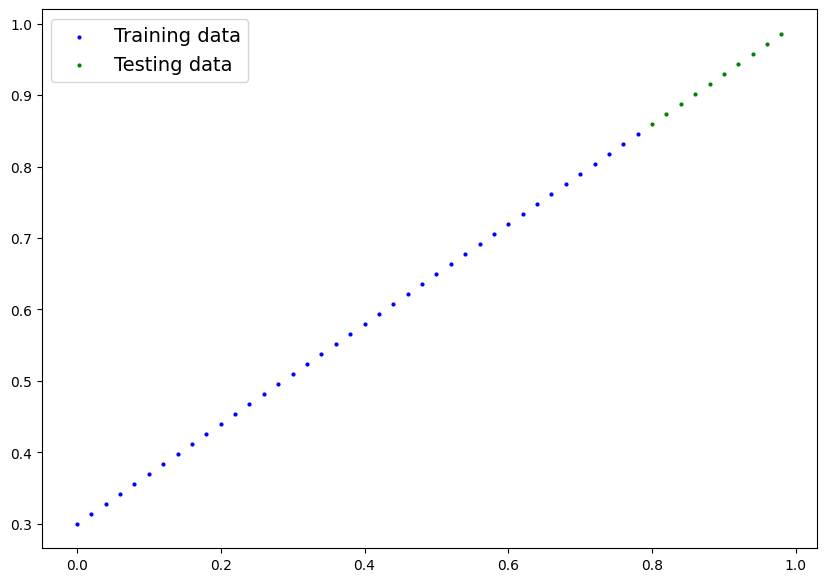

In [ ]:
plot_predictions();

## 3.2. 모델 구성하기

- 기본 선형 회귀(linear regression) 모델을 PyTorch 로 구현해봄.

- `nn.Module`을 상속한 객체에는 반드시 `forward()` 메서드가 정의되어야 함.

In [ ]:
# 위 설명을 읽어보며 모델 생성 코드 작성:
class LinearRegressionModel(nn.Module): # <- PyTorch에서 거의 모든 것은 nn.Module임
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1, # <- 무작위 weight으로 시작, 모델이 학습하며 이 값은 점점 조정됨.
                                                dtype=torch.float), # <- 기본값은 float32
                                   requires_grad=True) # <- 경사 하강법을 통해 이 값을 업데이트하도록 표시

        self.bias = nn.Parameter(torch.randn(1, # <- 무작위 bias로 시작, 마찬가지로 모델이 학습하며 값을 조정함.
                                            dtype=torch.float), # <- 기본값은 float32
                                requires_grad=True) # <- 경사 하강법을 통해 이 값을 업데이트하도록 표시

    # Forward은 모델의 연산을 정의함.
    def forward(self, x: torch.Tensor) -> torch.Tensor: # <- "x"는 입력 데이터
        return self.weights * x + self.bias # <- 이 코드가 선형 회귀 공식 (y = m*x + b)

| PyTorch 모듈                                                                                                    | 역할                                                                                                                          |
| ------------------------------------------------------------------------------------------------------------- | --------------------------------------------------------------------------------------------------------------------------- |
| [`torch.nn`](https://pytorch.org/docs/stable/nn.html)                                                         | Computational graph를 구성하는 모든 구성 요소들을 포함. (Computational graph란, 특정 방식으로 연산이 실행되는 구조를 말함.)                                                         |
| [`torch.nn.Parameter`](https://pytorch.org/docs/stable/generated/torch.nn.parameter.Parameter.html#parameter) | `nn.Module`과 함께 사용할 수 있는 텐서를 저장함. `requires_grad=True`로 설정되면 **자동 미분(autograd)** 을 통해 기울기가 자동 계산되어 모델 파라미터가 갱신됨.   |
| [`torch.nn.Module`](https://pytorch.org/docs/stable/generated/torch.nn.Module.html#torch.nn.Module)           | 모든 신경망 모듈의 기본 클래스. 신경망을 구성하는 모든 레이어는 이 클래스를 상속하여 구현됨. PyTorch로 신경망을 만들 때는 반드시 이 클래스를 상속하고 `forward()` 메서드를 정의해야 함.   |
| [`torch.optim`](https://pytorch.org/docs/stable/optim.html)                                                   | 다양한 최적화 알고리즘이 구현되어 있으며, 이 알고리즘들은 `nn.Parameter`에 저장된 파라미터를 어떻게 변경하면 손실(loss)을 줄이고, 경사 하강법을 더 잘 수행할 수 있는지 알려줌.     |
| `def forward()`                                                                                               | 모든 `nn.Module`의 하위 클래스는 `forward()` 메서드를 필수로 정의해야 함. 이 메서드는 해당 모듈에 전달된 데이터에 대해 어떤 계산이 수행될지를 명시함 (예: 위에서 다룬 선형 회귀 계산 등). |

## 3.3. PyTorch 모델 내용 확인하기

- 모델 훈련 전이라 예측 능력이 낮은 상태이지만, 아래 코드를 사용하여 모델의 파라미터를 확인할 수 있음.

In [ ]:
# nn.Parameter은 랜덤으로 초기화되므로 수동 시드 설정
torch.manual_seed(42)

# 모델 인스턴스 생성 (해당 객체는 nn.Parameter들을 포함한 nn.Module의 서브클래스임)
model_0 = LinearRegressionModel()

# nn.Module 서브클래스 안에 있는 nn.Parameter들 확인
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
# 파라미터 출력
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

## 3.4. PyTorch 모델로 예측하기

- 테스트 데이터인 `X_test`를 모델에 입력해
예측값이 실제 값 `y_test`와 얼마나 비슷한지 살펴볼 수 있음.

- 데이터를 모델에  입력하면, 모델은 내부의 `forward()` 메서드를 통해
정의한 연산을 수행하고 결과를 출력함.

- `torch.inference_mode()`는 모델을 추론(inference) 용도(예측을 수행할 때)로 전환함.

- 이는 순전파(forward-pass)를 더 빠르게 수행할 수 있도록 여러 기능들을 비활성화함. 예를 들어, 학습 시에는 필요한 gradient tracking도
추론 시에는 불필요하므로 자동으로 꺼짐.

> **참고:** 이전 버전의 PyTorch 코드에서는 `torch.no_grad()`도 사용하나 `torch.inference_mode()`가 더 최신이고 더 빠르며, 권장되는 방법임.

In [ ]:
# 예측 수행
with torch.inference_mode():
    y_preds = model_0(X_test)

# Note: 이전 버전의 PyTorch에서는 아래와 같이 no_grad 사용됨
# with torch.no_grad():
#   y_preds = model_0(X_test)

In [ ]:
# 예측 확인
print(f"Number of testing samples: {len(X_test)}")
print(f"Number of predictions made: {len(y_preds)}")
print(f"Predicted values:\n{y_preds}")

Number of testing samples: 10
Number of predictions made: 10
Predicted values:
tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])


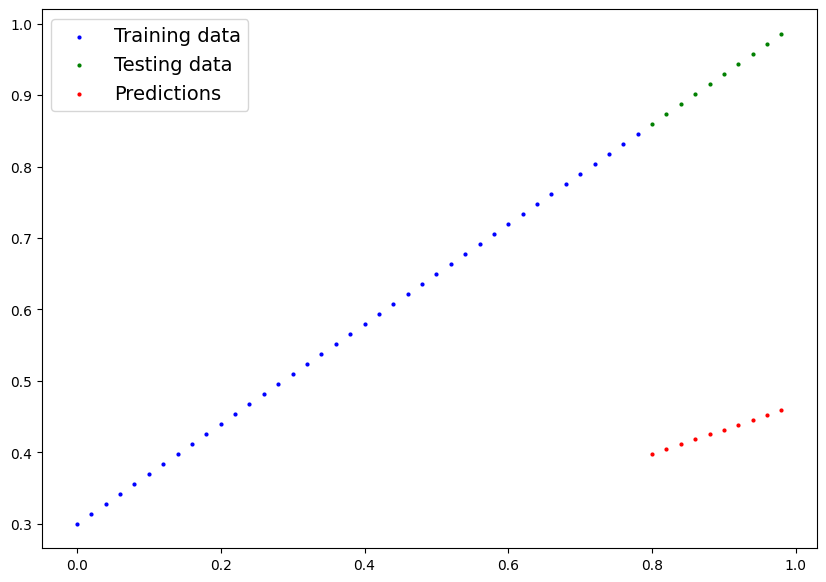

In [ ]:
plot_predictions(predictions=y_preds)

In [ ]:
y_test - y_preds

tensor([[0.4618],
        [0.4691],
        [0.4764],
        [0.4836],
        [0.4909],
        [0.4982],
        [0.5054],
        [0.5127],
        [0.5200],
        [0.5272]])

## 3.5. 모델 훈련하기

- 대부분 우리는 모델의 이상적인 파라미터가 무엇인지 알지 못함.

- 모델 내부의 파라미터를 최적화를 통해 업데이트시켜 정확한 예측을 하도록 모델을 훈련함.

- 모델이 스스로 파라미터를 업데이트하도록 **손실 함수(loss function)**와 **옵티마이저(optimizer)**을 정의함.

**손실 함수(loss function)**

- 모델의 예측값(`y_preds`)이 실제 정답(`y_test`)와 얼마나 다른지 측정함. 손실이 클수록 모델의 성능이 나쁘다는 것을 의미함.

- PyTorch 다큐멘테이션에서는 손실 함수를 'criterion' 혹은 'loss criterion'이라고 지칭하기도 하며, 모두 같은 의미임.

- PyTorch: [`torch.nn`](https://pytorch.org/docs/stable/nn.html#loss-functions)에 다양한 손실 함수가 구현되어 있음.

- 자주 사용되는 예시:
 - 회귀: MAE ([`torch.nn.L1Loss()`](https://pytorch.org/docs/stable/generated/torch.nn.L1Loss.html))
 - 분류: Binary Cross Entropy ([`torch.nn.BCELoss()`](https://pytorch.org/docs/stable/generated/torch.nn.BCELoss.html))


**옵티마이저(optimizer)**

- 손실을 줄이기 위해 모델의 내부 파라미터를 어떻게 업데이트할지 결정함.

- PyTorch: [`torch.optim`](https://pytorch.org/docs/stable/optim.html)에서 확인 가능

- 자주 사용되는 예시:
 - Stochastic Gradient Descent(SGD): [`torch.optim.SGD()`](https://pytorch.org/docs/stable/generated/torch.optim.SGD.html)
 - Adam : [`torch.optim.Adam()`](https://pytorch.org/docs/stable/generated/torch.optim.Adam.html)

In [ ]:
# 손실 함수 생성
loss_fn = nn.L1Loss() # MAE loss = L1Loss

# 옵티마이저 생성
optimizer = torch.optim.SGD(params=model_0.parameters(), # 최적화할 대상 모델의 파라미터들
                            lr=0.01) # 학습률(optimizer가 각 단계마다 파라미터를 얼마나 변경할지 결정함)

**Training Loop 정의:**

1. 순전파(forward pass): 모델이 학습 데이터를 한번 전체 통과하여 `forward()` 함수의 계산을 수행함.
> `model(x_train)`
2. 손실 계산: 모델의 출력값을 정답 레이블과 비교하여, 얼마나 틀렸는지 평가함.
> `loss = loss_fn(y_pred, y_train)`
3. 그래디언트 초기화: 옵티마이저의 그래디언트를 0으로 초기화함. (PyTorch에서는 기본적으로 그래디언트가 누적되기 때문에, 매 스텝마다 초기화해야함.)
> `optimizer.zero_grad()`
4. 역전파(backpropagation): 손실을 기준으로 각 파라미터에 대한 그래디언트를 계산함. (`requires_grad=True`인 모든 파라미터가 대상임.)
> `loss.backward()`
5. 옵티마이저 업데이트: 역전파로 계산된 그래디언트를 기반으로 파라미터를 업데이트
> `optimizer.step()`

In [ ]:
torch.manual_seed(42)

# 에폭 수 설정 (모델이 학습 데이터를 몇번 반복해서 학습할지 결정)
epochs = 100

# loss 값을 추정하기 위한 리스트 생성
train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):
    ### Training Loop

    # 모델을 학습 모드로 설정 (default 상태)
    model_0.train()

    # 1. forward 사용하여 학습 데이터에 대해 순전파 수행
    y_pred = model_0(X_train)

    # 2. loss 계산 (모델의 예측값이 실제값과 얼마나 다른지 측정)
    loss = loss_fn(y_pred, y_train)

    # 3. 옵티마이저 그래디언트 초기화
    optimizer.zero_grad()

    # 4. Loss 역전파
    loss.backward()

    # 5. 모델 파라미터 업데이트
    optimizer.step()

    ### 테스팅

    # 모델을 평가 모드로 설정
    model_0.eval()

    with torch.inference_mode():
      # 1. 테스트 데이터에 순전파
      test_pred = model_0(X_test)

      # 2. 테스트 데이터에 대해 loss 계산
      test_loss = loss_fn(test_pred, y_test.type(torch.float)) # 예측값은 float 데이터 타입으로 출력되므로, 비교 연산은 같은 타입의 텐서로 수행

      # 진행상황 출력
      if epoch % 10 == 0:
            epoch_count.append(epoch)
            train_loss_values.append(loss.detach().numpy())
            test_loss_values.append(test_loss.detach().numpy())
            print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss} ")

Epoch: 0 | MAE Train Loss: 0.31288138031959534 | MAE Test Loss: 0.48106518387794495 
Epoch: 10 | MAE Train Loss: 0.1976713240146637 | MAE Test Loss: 0.3463551998138428 
Epoch: 20 | MAE Train Loss: 0.08908725529909134 | MAE Test Loss: 0.21729660034179688 
Epoch: 30 | MAE Train Loss: 0.053148526698350906 | MAE Test Loss: 0.14464017748832703 
Epoch: 40 | MAE Train Loss: 0.04543796554207802 | MAE Test Loss: 0.11360953003168106 
Epoch: 50 | MAE Train Loss: 0.04167863354086876 | MAE Test Loss: 0.09919948130846024 
Epoch: 60 | MAE Train Loss: 0.03818932920694351 | MAE Test Loss: 0.08886633068323135 
Epoch: 70 | MAE Train Loss: 0.03476089984178543 | MAE Test Loss: 0.0805937647819519 
Epoch: 80 | MAE Train Loss: 0.03132382780313492 | MAE Test Loss: 0.07232122868299484 
Epoch: 90 | MAE Train Loss: 0.02788739837706089 | MAE Test Loss: 0.06473556160926819 


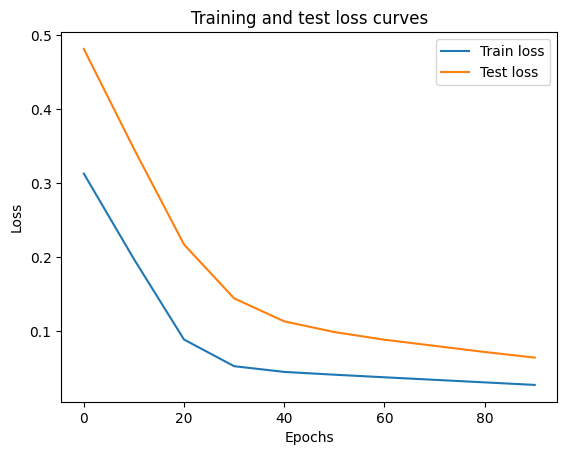

In [ ]:
# loss curve 시각화
plt.plot(epoch_count, train_loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

In [ ]:
# 학습된 모델 파라미터 출력
print("The model learned the following values for weights and bias:")
print(model_0.state_dict())
print("\nAnd the original values for weights and bias are:")
print(f"weights: {weight}, bias: {bias}")

The model learned the following values for weights and bias:
OrderedDict([('weights', tensor([0.5784])), ('bias', tensor([0.3513]))])

And the original values for weights and bias are:
weights: 0.7, bias: 0.3


> **실습과제:** 3. 위에서 `epochs` 값을 `200`으로 바꿔보시오. Loss curve와 모델의 `weight`, `bias`가 어떻게 바뀌는지 아레 셀에 코드를 작성하여 확인하시오.

In [ ]:
# 답:
torch.manual_seed(42)

# 에폭 수 설정 (모델이 학습 데이터를 몇번 반복해서 학습할지 결정)
epochs = 200

# loss 값을 추정하기 위한 리스트 생성
train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):
    ### Training Loop

    # 모델을 학습 모드로 설정 (default 상태)
    model_0.train()

    # 1. forward 사용하여 학습 데이터에 대해 순전파 수행
    y_pred = model_0(X_train)

    # 2. loss 계산 (모델의 예측값이 실제값과 얼마나 다른지 측정)
    loss = loss_fn(y_pred, y_train)

    # 3. 옵티마이저 그래디언트 초기화
    optimizer.zero_grad()

    # 4. Loss 역전파
    loss.backward()

    # 5. 모델 파라미터 업데이트
    optimizer.step()

    ### 테스팅

    # 모델을 평가 모드로 설정
    model_0.eval()

    with torch.inference_mode():
      # 1. 테스트 데이터에 순전파
      test_pred = model_0(X_test)

      # 2. 테스트 데이터에 대해 loss 계산
      test_loss = loss_fn(test_pred, y_test.type(torch.float)) # 예측값은 float 데이터 타입으로 출력되므로, 비교 연산은 같은 타입의 텐서로 수행

      # 진행상황 출력
      if epoch % 10 == 0:
            epoch_count.append(epoch)
            train_loss_values.append(loss.detach().numpy())
            test_loss_values.append(test_loss.detach().numpy())
            print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss} ")

Epoch: 0 | MAE Train Loss: 0.024458957836031914 | MAE Test Loss: 0.05646304413676262 
Epoch: 10 | MAE Train Loss: 0.021020207554101944 | MAE Test Loss: 0.04819049686193466 
Epoch: 20 | MAE Train Loss: 0.01758546568453312 | MAE Test Loss: 0.04060482233762741 
Epoch: 30 | MAE Train Loss: 0.014155393466353416 | MAE Test Loss: 0.03233227878808975 
Epoch: 40 | MAE Train Loss: 0.010716589167714119 | MAE Test Loss: 0.024059748277068138 
Epoch: 50 | MAE Train Loss: 0.0072835334576666355 | MAE Test Loss: 0.016474086791276932 
Epoch: 60 | MAE Train Loss: 0.0038517764769494534 | MAE Test Loss: 0.008201557211577892 
Epoch: 70 | MAE Train Loss: 0.008932482451200485 | MAE Test Loss: 0.005023092031478882 
Epoch: 80 | MAE Train Loss: 0.008932482451200485 | MAE Test Loss: 0.005023092031478882 
Epoch: 90 | MAE Train Loss: 0.008932482451200485 | MAE Test Loss: 0.005023092031478882 
Epoch: 100 | MAE Train Loss: 0.008932482451200485 | MAE Test Loss: 0.005023092031478882 
Epoch: 110 | MAE Train Loss: 0.0089

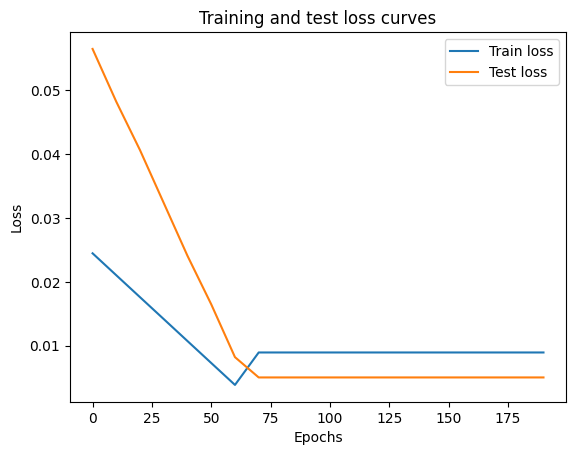

In [ ]:
# 답
# loss curve 시각화
plt.plot(epoch_count, train_loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

In [ ]:
# 답
# 학습된 모델 파라미터 출력
print("The model learned the following values for weights and bias:")
print(model_0.state_dict())
print("\nAnd the original values for weights and bias are:")
print(f"weights: {weight}, bias: {bias}")

The model learned the following values for weights and bias:
OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

And the original values for weights and bias are:
weights: 0.7, bias: 0.3


3.
original values for weights and bias

weight : 0.7
bias : 0.3

**epochs = 100**)

'weights', tensor([0.5784])), ('bias', tensor([0.3513])

**epochs = 200**)

'weights', tensor([0.6990])), ('bias', tensor([0.3093])

epochs 값을 200으로 두었을 때가 100으로 두었을 때보다 original value에 가까워지는 모습을 보인다.



## 3.6. 학습 완료된 모델로 예측하기 (추론, inference)

**Inference Loop**

1. 모델을 평가 모드로 설정함.
> `model.eval()`
2. `torch.inference_mode()`를 통해 예측을 수행함.

3. 모델과 입력 데이터는 반드시 동일한 device에 있어야 함.

In [ ]:
# 모델을 평가 모드로 설정
model_0.eval()

with torch.inference_mode():
  y_preds = model_0(X_test)
y_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

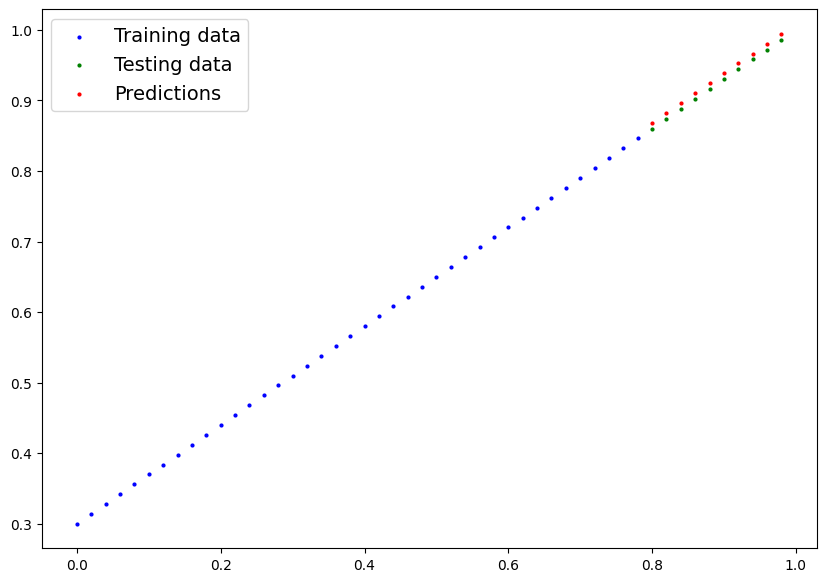

In [ ]:
plot_predictions(predictions=y_preds)

# 4. Classification

분류 문제의 종류:

<div align="center">
<img src="https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/02-different-classification-problems.png" alt="various different classification in machine learning such as binary classification, multiclass classification and multilabel classification" width=900/>

| 문제 종류 | 설명 | 예시 |
| ----- | ----- | ----- |
| 이진 분류 (Binary classification) | 타깃이 두 가지 중 하나일 수 있음 (예: 예 / 아니오) | 건강 정보를 기반으로 해당 사람이 심장 질환이 있는지 여부를 예측 |
| 다중 분류 (Multi-class classification) | 타깃이 두 가지를 초과하는 여러 선택지 중 하나일 수 있음 | 사진이 음식, 사람, 개 중 무엇인지 분류 |
| 다중 레이블 분류 (Multi-label classification) | 타깃에 둘 이상의 레이블이 할당될 수 있음 | 위키피디아 문서에 어떤 카테고리를 부여할지 예측 (예: 수학, 과학, 철학 등) |

분류 모델의 구성 요소:

| **하이퍼파라미터** | **Binary Classification** | **Multiclass classification** |
| --- | --- | --- |
| **입력층 형태** (`in_features`) | 특성 수와 동일 (예: 심장 질환 예측에서 나이, 성별, 키, 몸무게, 흡연 여부 = 5개) | 이진 분류와 동일 |
| **은닉층** | 문제에 따라 다름, 최소 1개, 최대 제한 없음 | 이진 분류와 동일 |
| **은닉층당 뉴런 수** | 문제에 따라 다름, 일반적으로 10\~512개 | 이진 분류와 동일 |
| **출력층 형태** (`out_features`) | 1 (두 클래스 중 하나) | 클래스당 1개 (예: 음식, 사람, 개 사진 분류의 경우 3개) |
| **은닉층 활성화 함수** | 일반적으로 [ReLU](https://pytorch.org/docs/stable/generated/torch.nn.ReLU.html) 사용, 하지만 [다른 여러 가지도 가능](https://en.wikipedia.org/wiki/Activation_function#Table_of_activation_functions) | 이진 분류와 동일 |
| **출력층 활성화 함수** | [시그모이드(Sigmoid)](https://en.wikipedia.org/wiki/Sigmoid_function) ([`torch.sigmoid`](https://pytorch.org/docs/stable/generated/torch.sigmoid.html)) | [소프트맥스(Softmax)](https://en.wikipedia.org/wiki/Softmax_function) ([`torch.softmax`](https://pytorch.org/docs/stable/generated/torch.nn.Softmax.html)) |
| **손실 함수** | [이진 크로스엔트로피(Binary crossentropy)](https://en.wikipedia.org/wiki/Cross_entropy#Cross-entropy_loss_function_and_logistic_regression) ([`torch.nn.BCELoss`](https://pytorch.org/docs/stable/generated/torch.nn.BCELoss.html)) | 크로스엔트로피(Cross entropy) ([`torch.nn.CrossEntropyLoss`](https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html)) |
| **옵티마이저** | [SGD](https://pytorch.org/docs/stable/generated/torch.optim.SGD.html) (확률적 경사 하강법), [Adam](https://pytorch.org/docs/stable/generated/torch.optim.Adam.html) ([`torch.optim`](https://pytorch.org/docs/stable/optim.html)에서 더 많은 옵션 확인 가능) | 이진 분류와 동일 |

## 4.1. 분류 데이터 생성

In [ ]:
from sklearn.datasets import make_circles

n_samples = 1000

X, y = make_circles(n_samples,
                    noise=0.03, # 노이즈 추가
                    random_state=42) # 시드값 설정

In [ ]:
# shape 확인
X.shape, y.shape

((1000, 2), (1000,))

In [ ]:
# 레이블 개수 확인
import numpy as np
np.unique(y, return_counts=True)

(array([0, 1]), array([500, 500]))

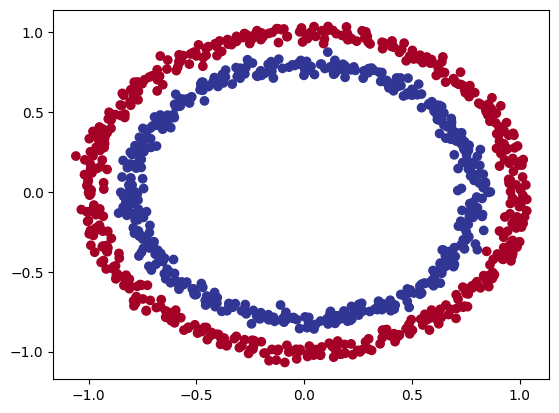

In [ ]:
# 데이터 시각화
import matplotlib.pyplot as plt
plt.scatter(x=X[:, 0],
            y=X[:, 1],
            c=y,
            cmap=plt.cm.RdYlBu);

In [ ]:
# 데이터 텐서로 변환
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

In [ ]:
# train/test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2, # 20% 테스트, 80% 훈련
                                                    random_state=42) # 시드 설정

len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

In [ ]:
# 데이터 GPU로 이동
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

## 4.2. 분류 모델 생성

- `X` 데이터를 입력으로 받아 `y` 형태로 출력하는 모델 필요



In [ ]:
# 1. nn.Module를 상속받는 모델 클래스 구성
class CircleModelV1(nn.Module):
    def __init__(self):
        super().__init__()
        # 2. X와 y의 입력 및 출력 형태를 처리할 수 있는 nn.Linear 레이어 2개 생성
        self.layer_1 = nn.Linear(in_features=2, out_features=5) # 2개의 입력 특성(X)을 받아 5개의 출력 특성을 생성
        self.layer_2 = nn.Linear(in_features=5, out_features=1) # 5개 특성을 받아 1개의 특성(y) 생성

    # 3. 순전파 연산을 포함하는 forward 메서드 정의
    def forward(self, x):
        # layer_2의 출력을 반환.
        return self.layer_2(self.layer_1(x)) # 계산은 먼저 layer_1을 거친 후, layer_1의 출력이 layer_2를 통과함.

# 4. 모델 인스턴스를 생성하고 GPU로 이동
model_1 = CircleModelV1().to(device)
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

[TensorFlow Playground website](https://playground.tensorflow.org/)을 통해 시각화한 모델의 레이어 구조:

![A visual example of what a classification neural network with linear activation looks like on the tensorflow playground](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/02-tensorflow-playground-linear-activation.png)

## 4.3. 손실 함수, optimizer, 평가 지표

- 문제 유형에 따라 손실 함수가 달라짐
 - 회귀: MAE 등을 손실 함수로 사용할 수 있음.
 - 분류: 이진 분류 문제인 경우 Binary Cross Entropy를 손실 함수로 사용함.

| 손실 함수 / 옵티마이저          | 문제 유형     | PyTorch 코드                                                                                                                                                                                       |
| ---------------------- | --------- | ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------ |
| 확률적 경사 하강법(SGD)        | 분류, 회귀 등  | [`torch.optim.SGD()`](https://pytorch.org/docs/stable/generated/torch.optim.SGD.html)                                                                                                            |
| Adam 옵티마이저             | 분류, 회귀 등  | [`torch.optim.Adam()`](https://pytorch.org/docs/stable/generated/torch.optim.Adam.html)                                                                                                          |
| 이진 크로스 엔트로피 손실         | 이진 분류     | [`torch.nn.BCEWithLogitsLoss`](https://pytorch.org/docs/stable/generated/torch.nn.BCEWithLogitsLoss.html), [`torch.nn.BCELoss`](https://pytorch.org/docs/stable/generated/torch.nn.BCELoss.html) |
| 크로스 엔트로피 손실            | 다중 클래스 분류 | [`torch.nn.CrossEntropyLoss`](https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html)                                                                                          |
| 평균 절대 오차(MAE, L1 Loss) | 회귀        | [`torch.nn.L1Loss`](https://pytorch.org/docs/stable/generated/torch.nn.L1Loss.html)                                                                                                              |
| 평균 제곱 오차(MSE, L2 Loss) | 회귀        | [`torch.nn.MSELoss`](https://pytorch.org/docs/stable/generated/torch.nn.MSELoss.html)                                                                                                            |

- PyTorch에는 두가지 Binary Cross Entropy 손실 함수가 구현되어 있음.
 1. [`torch.nn.BCELoss()`](https://pytorch.org/docs/stable/generated/torch.nn.BCELoss.html) : 입력값과 타깃 값 사이의 BCE를 계산 (시그모이드 함수 미포함)
 2. [`torch.nn.BCEWithLogitsLoss()`](https://pytorch.org/docs/stable/generated/torch.nn.BCEWithLogitsLoss.html) : 내부적으로 `nn.Sigmoid`가 포함되어 있어 수치적으로 더 안정적


본 실습에서는 손실 함수와 옵티마이터를 다음으로 설정함.
- 손실 함수: `torch.nn.BCEWithLogitsLoss()`
- 옵티마이저: `torch.optim.SGD()`

In [ ]:
# 손실 함수 생성
loss_fn = nn.BCEWithLogitsLoss()

# 옵티마이저 생성
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.1)

**평가 지표(evaluation metric)**

- 정말 간단하게, 손실 함수는 모델이 얼마나 틀렸는지 측정한다면 평가 지표는 모델이 얼마나 맞았는지를 측정함.

- 본 실습에서는 분류 모델의 성능 지표로 정확도(accuracy)를 사용함. 이는 전체 예측 중 정답을 맞춘 개수의 비율임.

In [ ]:
# 정확도 계간 함수
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item() # torch.eq() 두 텐서가 동일한 위치를 계산
    acc = (correct / len(y_pred)) * 100
    return acc

## 4.4. 모델 출력값에서 예측 레이블로 변환되는 과정 이해하기

In [ ]:
# 1. 순전파에서 무엇이 출력되는지 확인하기
y_logits = model_1(X_test.to(device))[:5]
y_logits

tensor([[-0.1269],
        [-0.0967],
        [-0.1908],
        [-0.1089],
        [-0.1667]], device='cuda:0', grad_fn=<SliceBackward0>)

- 위 셀의 값은 모델의 `forward()` 메서드의 출력임.

- 해당 메서드는 두개의 `nn.Linear()` 층을 포함하며, 내부적으로는 다음 수식을 계산함.

$$
\mathbf{y} = x \cdot \mathbf{Weights}^T  + \mathbf{bias}
$$


- 이 수식의 가공되지 않은 출력값들은 일반적으로 로짓(logit)이라고 불림.

- 이 출력값들을 정답 레이블과 비교 가능한 값으로 변환하기 위해 시그모이드 활성화 함수(activation function)을 사용함.

In [ ]:
# 모델 로짓에 시그모이드 적용
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.4683],
        [0.4758],
        [0.4524],
        [0.4728],
        [0.4584]], device='cuda:0', grad_fn=<SigmoidBackward0>)

- 위 값들은 **예측 확률**의 형태를 가지며, 해당 데이터 포인트가 어느 클래스에 속할 가능성이 얼마나 되는지 나타냄.

- 해당 실습에서는 이진 분류를 다루기 때문에, 이상적인 출력값은 0 또는 1임.

- 따라서 이 값들은 일종의 결정 경계(decision boundary)로 볼 수 있음.

 - 0에 가까울 수록, 모델은 해당 데이터 포인트가 클래스 0에 속할 가능성이 높다고 예측한 것이며,
 - 1에 가까울 수록, 모델은 클래스 1에 속할 가능성이 높다고 예측한 것임.

- 따라서,
 - `y_pred_probs ≥ 0.5`이면, `y = 1` (클래스 1)
 - `y_pred_probs < 0.5`이면, `y = 0` (클래스 0)

- 예측 확률을 예측 레이블로 변환하려면, 시그모이드 함수의 출력값을 반올림함.


In [ ]:
# 예측 확률 반올림
y_preds = torch.round(y_pred_probs)

In [ ]:
# 전체 코드로 통합
y_pred_labels = torch.round(torch.sigmoid(model_1(X_test.to(device))[:5]))

# 예측값과 실제 출력이 같은지 확인
print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))

# 추가 디멘션 삭제
y_preds.squeeze()

tensor([True, True, True, True, True], device='cuda:0')


tensor([0., 0., 0., 0., 0.], device='cuda:0', grad_fn=<SqueezeBackward0>)

In [ ]:
# 실제 레이블과 비교
y_test[:5]

tensor([1., 0., 1., 0., 1.], device='cuda:0')

- 이러한 형태로 모델의 예측값과 실제 테스트 데이터의 레이블을 비교하여 모델이 얼마나 잘 작동하는지 측정하여 평가할 수 있게 됨.

- 정리: 원시 출력값(로짓) -> [시그모이드 함수] -> 예측 확률 -> [반올림] -> 예측 라벨

## 4.5. 분류 모델 훈련하기

In [ ]:
epochs = 100

for epoch in range(epochs):
  ### Training
  model_1.train()

  # 1. 순전파
  y_logits = model_1(X_train).squeeze() # 불필요한 1 차원을 제거하기 위해 squeeze를 사용
  y_pred = torch.round(torch.sigmoid(y_logits)) # turn logits -> pred probs -> pred labls

  # 2. 손실/정확도 계산
  loss = loss_fn(y_logits, # 손실 함수로 nn.BCEWithLogitsLoss을 사용할 경우 raw logit으로 계산
                  y_train)
  acc = accuracy_fn(y_true=y_train,
                    y_pred=y_pred)

  # 3. Optimizer 그라디언트 초기화
  optimizer.zero_grad()

  # 4. 역전파
  loss.backward()

  # 5. 업데이트
  optimizer.step()

  ### Testing
  model_1.eval()
  with torch.inference_mode():
      # 1. 순전파
      test_logits = model_1(X_test).squeeze()
      test_pred = torch.round(torch.sigmoid(test_logits))
      # 2. 손실/정확도 계산
      test_loss = loss_fn(test_logits,
                          y_test)
      test_acc = accuracy_fn(y_true=y_test,
                              y_pred=test_pred)

  # 10 epochs 마다 출력
  if epoch % 10 == 0:
      print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.69569, Accuracy: 50.00% | Test loss: 0.69721, Test acc: 50.00%
Epoch: 10 | Loss: 0.69403, Accuracy: 50.00% | Test loss: 0.69615, Test acc: 50.00%
Epoch: 20 | Loss: 0.69343, Accuracy: 46.00% | Test loss: 0.69585, Test acc: 48.50%
Epoch: 30 | Loss: 0.69321, Accuracy: 49.00% | Test loss: 0.69577, Test acc: 47.50%
Epoch: 40 | Loss: 0.69312, Accuracy: 49.50% | Test loss: 0.69573, Test acc: 46.50%
Epoch: 50 | Loss: 0.69308, Accuracy: 50.38% | Test loss: 0.69569, Test acc: 46.50%
Epoch: 60 | Loss: 0.69306, Accuracy: 50.50% | Test loss: 0.69564, Test acc: 46.50%
Epoch: 70 | Loss: 0.69305, Accuracy: 50.50% | Test loss: 0.69559, Test acc: 46.50%
Epoch: 80 | Loss: 0.69304, Accuracy: 50.75% | Test loss: 0.69553, Test acc: 46.50%
Epoch: 90 | Loss: 0.69303, Accuracy: 50.38% | Test loss: 0.69547, Test acc: 46.50%


## 4.6. 예측 및 모델 평가

In [ ]:
import requests
from pathlib import Path

if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

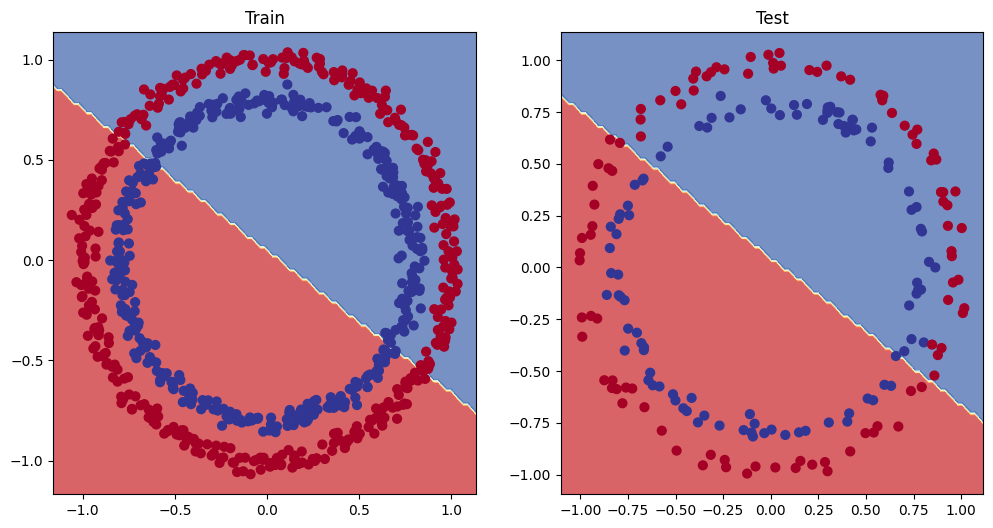

In [ ]:
# 전체 데이터에 대해 결정 경계 시각화
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_1, X_test, y_test)

## 4.7. 모델 개선: non-linearity 추가

- 이전 모델은 선형(직선) 함수만을 사용함. 그러나 위 데이터는 원형 구조로, 비선형적임.

- 모델에 비선형 활성화 함수를 추가하여 이를 개선함.

- 가장 흔하게 사용되는 함수는 [ReLU](https://en.wikipedia.org/wiki/Rectifier_(neural_networks)) (rectified linear-unit, [`torch.nn.ReLU()`](https://pytorch.org/docs/stable/generated/torch.nn.ReLU.html))임.

- PyTorch에서 이미 구현해놓은 [비선형 함수](https://pytorch.org/docs/stable/nn.html#non-linear-activations-weighted-sum-nonlinearity)들도 참고

In [ ]:
# 비선형 함수를 추가하여 모델 재구성
class CircleModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10)
        self.layer_3 = nn.Linear(in_features=10, out_features=1)
        self.relu = nn.ReLU() # <- ReLU activation function 추가

    def forward(self, x):
      # 레이어 사이에 ReLU 활성화 함수 넣기
       return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

model_2 = CircleModelV2().to(device)
print(model_2)

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)


In [ ]:
# 손실 함수, 옵티마이저
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model_2.parameters(), lr=0.1)

In [ ]:
# 모델 훈련
epochs = 1000

for epoch in range(epochs):
    # 1. 순전파
    y_logits = model_2(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits)) # 로짓 -> 예측 확률 -> 예측 레이블

    # 2. 손실/정확도 계산
    loss = loss_fn(y_logits, y_train)
    acc = accuracy_fn(y_true=y_train,
                      y_pred=y_pred)

    # 3. Optimizer 그라디언트 초기화
    optimizer.zero_grad()

    # 4. 역전파
    loss.backward()

    # 5. 업데이트
    optimizer.step()

    ### Testing
    model_2.eval()
    with torch.inference_mode():
      # 1. 순전파
      test_logits = model_2(X_test).squeeze()
      test_pred = torch.round(torch.sigmoid(test_logits)) # 로짓 -> 예측 확률 -> 예측 레이블
      # 2. 손실/정확도 계산
      test_loss = loss_fn(test_logits, y_test)
      test_acc = accuracy_fn(y_true=y_test,
                             y_pred=test_pred)

    # 훈련 상태 출력
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Accuracy: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.69335, Accuracy: 50.00% | Test Loss: 0.69233, Test Accuracy: 50.00%
Epoch: 100 | Loss: 0.68944, Accuracy: 62.25% | Test Loss: 0.68966, Test Accuracy: 68.00%
Epoch: 200 | Loss: 0.68515, Accuracy: 69.75% | Test Loss: 0.68761, Test Accuracy: 67.00%
Epoch: 300 | Loss: 0.67838, Accuracy: 60.50% | Test Loss: 0.68440, Test Accuracy: 51.50%
Epoch: 400 | Loss: 0.66968, Accuracy: 63.12% | Test Loss: 0.67916, Test Accuracy: 53.50%
Epoch: 500 | Loss: 0.65562, Accuracy: 68.38% | Test Loss: 0.66784, Test Accuracy: 60.50%
Epoch: 600 | Loss: 0.63156, Accuracy: 82.38% | Test Loss: 0.64616, Test Accuracy: 78.00%
Epoch: 700 | Loss: 0.58692, Accuracy: 92.50% | Test Loss: 0.60456, Test Accuracy: 89.00%
Epoch: 800 | Loss: 0.50680, Accuracy: 96.50% | Test Loss: 0.52957, Test Accuracy: 93.50%
Epoch: 900 | Loss: 0.38962, Accuracy: 97.88% | Test Loss: 0.41861, Test Accuracy: 94.00%


## 4.8. 개선된 모델 확인

In [ ]:
model_2.eval()
with torch.inference_mode():
    y_preds = torch.round(torch.sigmoid(model_2(X_test))).squeeze()
y_preds[:10], y[:10]

(tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.], device='cuda:0'),
 tensor([1., 1., 1., 1., 0., 1., 1., 1., 1., 0.]))

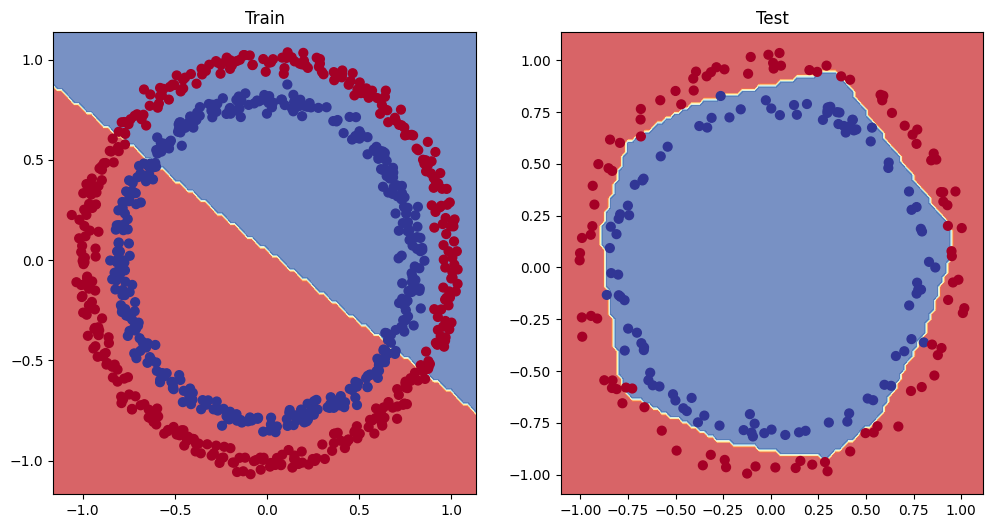

In [ ]:
# 데이터 전체에 결정 경계 시각화
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train) # model_1 = 선형 분류 모델
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_2, X_test, y_test) # model_2 = 비선형 분류 모델